In [97]:
# import modules


run ='isomip_plus'
vers='ocean1'
plotting = False

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import sys
import xarray as xr
import scipy.io as sio
from scipy.interpolate import griddata
import datetime
import cmocean


import socket
comp_name = socket.gethostname()
if comp_name=='SEES-3PV4VV3':
    print('running locally')
else:
    os.chdir('/g/data/jk72/deg581/shackleton-setup/notebooks')


#proj_dir = os.path.join(os.pardir,os.pardir)
proj_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(proj_dir,'data')
src_dir = os.path.join(proj_dir,'src')

sys.path.append(src_dir)


grdfile = '../data/raw/isomip_plus_ocean1.nc'

N=21

running locally


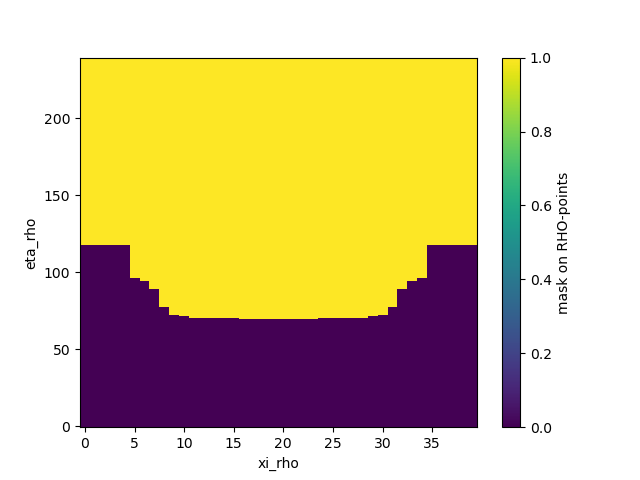

In [98]:
# load grid file

grd = xr.open_dataset(grdfile)


%matplotlib widget
plt.close()
# grd.mask_rho.plot()
# plt.grid()
# plt.show()
# plt.show()
# grd.h.isel(xi_rho=19).plot(marker='x')
# (-grd.zice).isel(xi_rho=19).plot(marker='x')
# plt.axis((68,70,0,900))

grd.mask_rho.plot()


In [99]:
# define points for flow

no_rivers = 1

river_no = np.arange(1,no_rivers+1,1)

river_time = np.array([1])

river_Xposition = np.array([20])

river_Eposition = np.array([71])

river_direction = np.array([1])



In [100]:
# map those points to correct xi,eta points


In [101]:
# calculate transports

river_input_data = np.array([100])

river_input_sign = np.array([1])

river_transport = np.tile(river_input_data*river_input_sign,[len(river_time),1])



In [102]:
# make vertical distribution

vshape_profile = np.arange(1,N+1)/(np.sum(np.arange(1,N+1)))

river_Vshape = (np.tile(vshape_profile,(no_rivers,1))).T

In [103]:

# import ipywidgets as widgets
# from IPython.display import display
# # Global variables to store clicked points and the connection ID
# clicked_points = []
# cid = None  # Callback connection ID
# fig, ax = None, None  # Figure and axes objects
# line = None  # Line object for dynamic updates

# def interactive_plot_and_select_points():
#     """
#     Sets up the interactive plot for selecting points.
#     Initializes global variables and the callback connection.
#     """
#     global clicked_points, cid, fig, ax, line
#     clicked_points = []  # Reset the points list
    
#     # Create the figure and axes
#     fig, ax = plt.subplots(figsize=(15,12))
#     line, = ax.plot([], [], 'r-', label='Clicked Path')  # Initialize an empty red line
#     ax.legend()
#     ax.set_title("Click on the plot to create a connected path")

#     # Define a callback function to record clicks and update the line
#     def on_click(event):
#         if event.inaxes == ax:  # Ensure the click is on the plot axes
#             clicked_points.append((event.xdata, event.ydata))
#             print(f"Point added: ({event.xdata:.2f}, {event.ydata:.2f})")
#             # Update the line dynamically
#             x_vals, y_vals = zip(*clicked_points)
#             line.set_data(x_vals, y_vals)
#             fig.canvas.draw()

#     # Connect the click event to the callback
#     cid = fig.canvas.mpl_connect('button_press_event', on_click)

#     print("Interactive plot setup complete. Click to select points.")
    
#     # Add an "Finish Selection" button using ipywidgets
#     finish_button = widgets.Button(description="Finish Selection")
#     finish_button.on_click(on_finish)
    
#     # Display the button below the plot
#     display(finish_button)

#     # This ensures the interactive plot is shown and stays active in the notebook
#     plt.show()

# def on_finish(event):
#     """
#     Handle button click event to finalize the selection and print the clicked points.
#     """
#     global clicked_points
#     # Convert clicked points to NumPy array and return
#     points_array = np.array(clicked_points)
#     # Print the points in a format that's easy to copy into a numpy array
#     print("Selection finished. Final clicked points as array:")
    
#     # Format the output for easy copying
#     formatted_points = ",\n ".join([f"({x:.9f}, {y:.9f})" for x, y in clicked_points])
#     print(f"np.array([\n {formatted_points}\n])")
    
#     plt.close(fig)  # Close the plot after finishing


In [104]:
# define T/S/dye properties

Salinity = 0

river_salt = np.tile(Salinity,[len(river_time),N,len(river_no)])

import seawater as sw

Temperature = np.empty_like(river_no)*np.NaN
for nn in range(no_rivers):
    if river_direction[nn]==1:
        zice_at_loc = -grd.zice.isel(xi_rho=river_Xposition,eta_rho=river_Eposition-1)
        h_at_loc = grd.h.isel(xi_rho=river_Xposition,eta_rho=river_Eposition-1)
        av_height_at_loc = (zice_at_loc+h_at_loc)/2
        av_pres_at_loc = sw.pres(av_height_at_loc,-67*np.ones((river_no).shape))
        ptmp_at_loc = sw.ptmp(0,sw.fp(0, av_pres_at_loc),av_pres_at_loc)
        
    Temperature[nn] = ptmp_at_loc
    
river_temp = np.tile(Temperature,[len(river_time),N,len(river_no)])


In [105]:
# add dye for inert tracer

IniConc = 100
river_dye_01 = np.tile(IniConc,[len(river_time),N,len(river_no)])



In [106]:
# make netcdf



river_da = xr.DataArray(river_no,name="river",dims=['river'])
river_direction_da = xr.DataArray(river_direction,name="river_direction",dims=['river'])
river_Xposition_da = xr.DataArray(river_Xposition,name="river_Xposition",dims=['river'])
river_Eposition_da = xr.DataArray(river_Eposition,name="river_Eposition",dims=['river'])
river_Vshape_da = xr.DataArray(river_Vshape,name="river_Vshape",dims=['s_rho','river'])
river_time_da = xr.DataArray(river_time,name="river_time",dims=['river_time'])
river_transport_da = xr.DataArray(river_transport,name="river_transport",dims=['river_time','river'])
river_temp_da = xr.DataArray(river_temp,name="river_temp",dims=['river_time','s_rho','river'])
river_salt_da = xr.DataArray(river_salt,name="river_salt",dims=['river_time','s_rho','river'])
river_salt_da = xr.DataArray(river_salt,name="river_salt",dims=['river_time','s_rho','river'])

river_dye_01_da = xr.DataArray(river_dye_01,name="river_dye_01",dims=['river_time','s_rho','river'])



rivers = xr.Dataset({'river':river_da,
                'river_direction':river_direction_da,
                'river_Xposition':river_Xposition_da,
                'river_Eposition':river_Eposition_da,
                'river_Vshape':river_Vshape_da,
                'river_time':river_time_da,
                'river_transport':river_transport_da,
                'river_temp':river_temp_da,
                'river_salt':river_salt_da,
                'river_dye_01':river_dye_01_da
                },
               attrs={'title':run+'_'+vers+'_rivers.nc',
                      'history': 'RIVERS file using make_rivers.py,'+str(datetime.date.today()),
                      'type': 'ROMS grid file',
                      'grd_file':grdfile})



In [107]:
#export netcdf

rivers.to_netcdf('../data/proc/'+run+'_'+vers+'_rivers.nc')